In [195]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Загрузка данных

In [2]:
data = pd.read_csv('./data/amine_treatment-final.csv', on_bad_lines='skip')
data

,"feed_gas temperature, C","feed_gas pressure, kPa","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas actual liquid flow, m3/h","feed_gas actual vapour flow, m3/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,...,degased_amine Propane mol frac,degased_amine i-Butane mol frac,degased_amine n-Butane mol frac,degased_amine i-Pentane mol frac,degased_amine n-Pentane mol frac,degased_amine H2S mol frac,degased_amine H2O mol frac,degased_amine MDEAmine mol frac,degased_amine H2S ppm,degased_amine CO2 ppm
0,52.0,6701.325,259647.0,24.668523,80.705482,0.000000,3217.216383,0.031875,0.633122,0.192729,...,0.000004,1.979803e-06,6.785930e-06,3.039502e-08,1.629357e-07,0.014838,0.910916,0.062270,22521.880092,23245.607009
1,40.0,6701.325,63853.0,23.411939,79.292250,0.000000,805.286774,0.039520,0.681947,0.179992,...,0.000006,1.099164e-07,7.886635e-07,2.425456e-06,2.679624e-08,0.010470,0.896612,0.077190,15891.219056,30468.484150
2,46.0,6701.325,15928.0,27.803853,108.358884,0.000000,146.993024,0.027859,0.577870,0.163095,...,0.000018,5.179434e-05,2.863001e-05,4.721545e-06,1.359401e-06,0.001284,0.860268,0.132676,1949.372531,10648.306282
3,36.0,6701.325,150276.0,22.053344,74.092459,0.000000,2028.222609,0.005420,0.856717,0.000249,...,0.000039,8.734358e-06,3.706189e-05,5.426945e-05,3.949909e-06,0.001233,0.809722,0.184359,1871.528366,8438.736973
4,12.0,6701.325,52691.0,24.334510,114.182302,0.002870,461.460940,0.027297,0.694634,0.091063,...,0.000100,7.719691e-05,2.661312e-05,1.351350e-05,6.619552e-06,0.003300,0.788340,0.200715,5008.207346,14011.150105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512795,18.0,6701.325,278813.0,27.267819,147.437736,0.239690,1890.816202,0.036621,0.666807,0.042159,...,0.000053,1.226987e-04,3.336251e-05,4.145371e-06,8.510407e-06,0.002101,0.796328,0.187149,3188.443718,27411.897443
512796,33.0,6701.325,72612.0,26.629816,112.530303,0.000000,645.266193,0.025383,0.605142,0.150361,...,0.000049,8.271254e-05,1.199104e-05,1.810930e-06,4.749955e-06,0.003784,0.826966,0.162727,5742.847844,11941.343733
512797,17.0,6701.325,272718.0,26.290335,135.390018,0.133398,2014.180541,0.039356,0.606850,0.167318,...,0.000037,2.874297e-05,3.343060e-06,1.045919e-05,2.187381e-06,0.045335,0.725301,0.179546,68812.636471,97071.672175
512798,59.0,6701.325,75970.0,24.231673,73.727565,0.000000,1030.415146,0.037951,0.732049,0.086286,...,0.000013,1.782460e-05,8.286743e-06,5.417825e-06,2.393693e-07,0.002551,0.877567,0.106280,3871.441495,26287.366187


## Модель для определения температуры продуктов

In [3]:
mini_data = data.sample(frac=0.25)
len(mini_data)

128200

In [5]:
list(mini_data.columns)

['feed_gas temperature, C',
 'feed_gas pressure, kPa',
 'feed_gas mass flow, kg/h',
 'feed_gas molecular weight',
 'feed_gas Mass density, kg/m3',
 'feed_gas actual liquid flow, m3/h',
 'feed_gas actual vapour flow, m3/h',
 'feed_gas CO2 mol frac',
 'feed_gas Methane mol frac',
 'feed_gas Ethane mol frac',
 'feed_gas Propane mol frac',
 'feed_gas i-Butane mol frac',
 'feed_gas n-Butane mol frac',
 'feed_gas i-Pentane mol frac',
 'feed_gas n-Pentane mol frac',
 'feed_gas H2S mol frac',
 'feed_gas H2O mol frac',
 'feed_gas MDEAmine mol frac',
 'feed_gas H2S ppm',
 'feed_gas CO2 ppm',
 'Absorber number of stages',
 'lean_amine temperature, C',
 'lean_amine pressure, kPa',
 'lean_amine mass flow, kg/h',
 'lean_amine molecular weight',
 'lean_amine Mass density, kg/m3',
 'lean_amine actual liquid flow, m3/h',
 'lean_amine actual vapour flow, m3/h',
 'lean_amine CO2 mol frac',
 'lean_amine Methane mol frac',
 'lean_amine Ethane mol frac',
 'lean_amine Propane mol frac',
 'lean_amine i-Butane

In [6]:
sulphur = data[['feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac',
                'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 
                'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
                'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
                'feed_gas MDEAmine mol frac',
                'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac',
                'lean_amine Methane mol frac', 'lean_amine Ethane mol frac', 'lean_amine Propane mol frac',
                'lean_amine i-Butane mol frac', 'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac',
                'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
                'lean_amine MDEAmine mol frac', 'sweet_gas temperature, C', 'rich_amine temperature, C'
               ]]

X = sulphur[[
                'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac',
                'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 
                'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
                'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
                'feed_gas MDEAmine mol frac',
                'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac',
                'lean_amine Methane mol frac', 'lean_amine Ethane mol frac', 'lean_amine Propane mol frac',
                'lean_amine i-Butane mol frac', 'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac',
                'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
                'lean_amine MDEAmine mol frac'
]]

y = sulphur[['sweet_gas temperature, C', 'rich_amine temperature, C']]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), ['feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac',
                'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 
                'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
                'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
                'feed_gas MDEAmine mol frac',
                'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac',
                'lean_amine Methane mol frac', 'lean_amine Ethane mol frac', 'lean_amine Propane mol frac',
                'lean_amine i-Butane mol frac', 'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac',
                'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
                'lean_amine MDEAmine mol frac'])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((410240, 26), (410240, 2))

In [86]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
prod_temp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(2)
])

# 2. Compile the model
prod_temp_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
prod_temp_model.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
12820/12820 [==============================] - 31s 2ms/step - loss: 2.8807 - mae: 2.8807
Epoch 2/20
12820/12820 [==============================] - 31s 2ms/step - loss: 1.7489 - mae: 1.7489
Epoch 3/20
12820/12820 [==============================] - 31s 2ms/step - loss: 1.5962 - mae: 1.5962
Epoch 4/20
12820/12820 [==============================] - 32s 2ms/step - loss: 1.4959 - mae: 1.4959
Epoch 5/20
12820/12820 [==============================] - 31s 2ms/step - loss: 1.4451 - mae: 1.4451
Epoch 6/20
12820/12820 [==============================] - 32s 2ms/step - loss: 1.4027 - mae: 1.4027
Epoch 7/20
12820/12820 [==============================] - 31s 2ms/step - loss: 1.3708 - mae: 1.3708
Epoch 8/20
12820/12820 [==============================] - 32s 2ms/step - loss: 1.3418 - mae: 1.3418
Epoch 9/20
12820/12820 [==============================] - 31s 2ms/step - loss: 1.3195 - mae: 1.3195
Epoch 10/20
12820/12820 [==============================] - 32s 2ms/step - loss: 1.3019 - mae: 1.3019

In [87]:
y_pred = prod_temp_model.predict(X_test_normal)

3205/3205 [==============================] - 4s 1ms/step


In [107]:
y_pred[101]

array([57.381298, 55.735657], dtype=float32)

In [108]:
y_test.iloc[101]

sweet_gas temperature, C     57.480083
rich_amine temperature, C    55.968702
Name: 237204, dtype: float64

In [110]:
100 - ((55.735657 * 100) / 55.968702)

0.4163845000371822

In [111]:
prod_temp_model.save('./models/amine_treatment/amine_treatment_prod_temp_model.h5')

In [12]:
sulphur_data = sulphur.sample(frac=0.01)
sulphur_data

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,feed_gas Propane mol frac,feed_gas i-Butane mol frac,feed_gas n-Butane mol frac,feed_gas i-Pentane mol frac,feed_gas n-Pentane mol frac,...,lean_amine Propane mol frac,lean_amine i-Butane mol frac,lean_amine n-Butane mol frac,lean_amine i-Pentane mol frac,lean_amine n-Pentane mol frac,lean_amine H2S mol frac,lean_amine H2O mol frac,lean_amine MDEAmine mol frac,"sweet_gas temperature, C","rich_amine temperature, C"
229777,59.0,295333.0,0.037486,0.709195,0.027945,0.049124,0.096944,0.016101,0.022952,0.004392,...,0.0,0.0,0.0,0.0,0.0,0.000211,0.977453,0.019753,63.534447,65.537233
230248,22.0,51765.0,0.036442,0.649914,0.060758,0.072099,0.052338,0.046696,0.041313,0.003336,...,0.0,0.0,0.0,0.0,0.0,0.000344,0.810059,0.184826,25.056876,30.451538
142441,53.0,94584.0,0.026240,0.633435,0.186715,0.090658,0.019003,0.011180,0.025023,0.002668,...,0.0,0.0,0.0,0.0,0.0,0.000291,0.890271,0.108304,26.411256,36.111568
236140,39.0,135235.0,0.028697,0.800068,0.024626,0.082167,0.009194,0.023052,0.017758,0.006773,...,0.0,0.0,0.0,0.0,0.0,0.000181,0.839054,0.157503,35.072823,45.195079
328006,50.0,27226.0,0.024775,0.728327,0.096035,0.039802,0.018610,0.062545,0.017170,0.009563,...,0.0,0.0,0.0,0.0,0.0,0.000238,0.899695,0.097257,40.644903,46.896273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127774,57.0,106247.0,0.007134,0.564712,0.150123,0.092254,0.052006,0.076666,0.035214,0.003127,...,0.0,0.0,0.0,0.0,0.0,0.000139,0.860390,0.136670,33.316939,47.659560
340722,12.0,139188.0,0.014490,0.654710,0.126441,0.074161,0.058075,0.011644,0.014428,0.007704,...,0.0,0.0,0.0,0.0,0.0,0.000116,0.858768,0.137278,23.306435,25.228895
460614,20.0,278135.0,0.020406,0.661170,0.083639,0.022305,0.068197,0.078623,0.049696,0.000717,...,0.0,0.0,0.0,0.0,0.0,0.000386,0.845761,0.152531,21.611649,26.587039
437188,43.0,94367.0,0.028831,0.658443,0.177795,0.036555,0.024317,0.051922,0.007627,0.000021,...,0.0,0.0,0.0,0.0,0.0,0.000317,0.980460,0.017175,32.290935,35.745604


In [13]:
sulphur_data.to_csv('sulphur_data.csv')

## Модель для определения концентрации H2S в насыщенном амине

In [145]:
mini_data = data.sample(frac=0.95)
len(mini_data)

487160

In [146]:
mini_data['rich_amine H2S mol frac']

232297    0.001068
45872     0.025660
458724    0.016974
312883    0.009915
353928    0.015174
            ...   
177225    0.028253
272160    0.002352
1516      0.000608
315124    0.002908
367408    0.004704
Name: rich_amine H2S mol frac, Length: 487160, dtype: float64

In [147]:
mini_data['rich_amine H2S mol frac'] = mini_data['rich_amine H2S mol frac'] * 100

In [148]:
mini_data['rich_amine H2S mol frac']

232297    0.106803
45872     2.566015
458724    1.697410
312883    0.991536
353928    1.517419
            ...   
177225    2.825303
272160    0.235161
1516      0.060772
315124    0.290813
367408    0.470371
Name: rich_amine H2S mol frac, Length: 487160, dtype: float64

In [207]:
mini_data = mini_data[mini_data["rich_amine H2S mol frac"] > 0.001]

In [208]:
list(mini_data.columns)

['feed_gas temperature, C',
 'feed_gas pressure, kPa',
 'feed_gas mass flow, kg/h',
 'feed_gas molecular weight',
 'feed_gas Mass density, kg/m3',
 'feed_gas actual liquid flow, m3/h',
 'feed_gas actual vapour flow, m3/h',
 'feed_gas CO2 mol frac',
 'feed_gas Methane mol frac',
 'feed_gas Ethane mol frac',
 'feed_gas Propane mol frac',
 'feed_gas i-Butane mol frac',
 'feed_gas n-Butane mol frac',
 'feed_gas i-Pentane mol frac',
 'feed_gas n-Pentane mol frac',
 'feed_gas H2S mol frac',
 'feed_gas H2O mol frac',
 'feed_gas MDEAmine mol frac',
 'feed_gas H2S ppm',
 'feed_gas CO2 ppm',
 'Absorber number of stages',
 'lean_amine temperature, C',
 'lean_amine pressure, kPa',
 'lean_amine mass flow, kg/h',
 'lean_amine molecular weight',
 'lean_amine Mass density, kg/m3',
 'lean_amine actual liquid flow, m3/h',
 'lean_amine actual vapour flow, m3/h',
 'lean_amine CO2 mol frac',
 'lean_amine Methane mol frac',
 'lean_amine Ethane mol frac',
 'lean_amine Propane mol frac',
 'lean_amine i-Butane

In [209]:
sulphur = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac', 'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac',
    'lean_amine Methane mol frac', 'lean_amine Ethane mol frac', 'lean_amine Propane mol frac',
    'lean_amine i-Butane mol frac', 'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac',
    'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'rich_amine H2S mol frac'
               ]]

X = sulphur[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac', 'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac',
    'lean_amine Methane mol frac', 'lean_amine Ethane mol frac', 'lean_amine Propane mol frac',
    'lean_amine i-Butane mol frac', 'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac',
    'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
]]

y = sulphur[['rich_amine H2S mol frac']]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac', 'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac',
    'lean_amine Methane mol frac', 'lean_amine Ethane mol frac', 'lean_amine Propane mol frac',
    'lean_amine i-Butane mol frac', 'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac',
    'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((410240, 26), (410240, 1))

In [240]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_h2s_model = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_h2s_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_h2s_model.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
12820/12820 [==============================] - 22s 2ms/step - loss: 0.0017 - mae: 0.0017
Epoch 2/20
12820/12820 [==============================] - 25s 2ms/step - loss: 9.0009e-04 - mae: 9.0009e-04
Epoch 3/20
12820/12820 [==============================] - 26s 2ms/step - loss: 7.6664e-04 - mae: 7.6664e-04
Epoch 4/20
12820/12820 [==============================] - 26s 2ms/step - loss: 6.9513e-04 - mae: 6.9513e-04
Epoch 5/20
12820/12820 [==============================] - 26s 2ms/step - loss: 6.5620e-04 - mae: 6.5620e-04
Epoch 6/20
12820/12820 [==============================] - 28s 2ms/step - loss: 6.1473e-04 - mae: 6.1473e-04
Epoch 7/20
12820/12820 [==============================] - 27s 2ms/step - loss: 5.9307e-04 - mae: 5.9307e-04
Epoch 8/20
12820/12820 [==============================] - 28s 2ms/step - loss: 5.7751e-04 - mae: 5.7751e-04
Epoch 9/20
12820/12820 [==============================] - 29s 2ms/step - loss: 5.5879e-04 - mae: 5.5879e-04
Epoch 10/20
12820/12820 [===========

In [241]:
y_pred = lean_amine_h2s_model.predict(X_test_normal)

3205/3205 [==============================] - 3s 828us/step


In [254]:
x = 123
pred = y_pred[x][0].round(4)
pred

0.0022

In [255]:
test = round(y_test["rich_amine H2S mol frac"].tolist()[x], 4)
test

0.0024

In [256]:
100 - (pred * 100) / test

8.333333830038697

In [215]:
error = (y_pred * 100) / y_test
error

,rich_amine H2S mol frac
337566,102.875990
201781,103.701823
215224,101.442201
8834,100.994673
394112,104.099943
...,...
396710,128.371847
447239,103.322737
217230,107.316821
397167,106.862269


In [216]:
error.mean()

rich_amine H2S mol frac    107.589983
dtype: float64

In [186]:
mini_data["rich_amine H2S mol frac"]

232297    0.106803
45872     2.566015
458724    1.697410
312883    0.991536
353928    1.517419
            ...   
177225    2.825303
272160    0.235161
1516      0.060772
315124    0.290813
367408    0.470371
Name: rich_amine H2S mol frac, Length: 487160, dtype: float64

In [201]:
mini_data["steps"] = pd.DataFrame({"steps": np.arange(0, len(mini_data["rich_amine H2S mol frac"]))})
mini_data["steps"]

232297    232297.0
45872      45872.0
458724    458724.0
312883    312883.0
353928    353928.0
            ...   
177225    177225.0
272160    272160.0
1516        1516.0
315124    315124.0
367408    367408.0
Name: steps, Length: 487160, dtype: float64

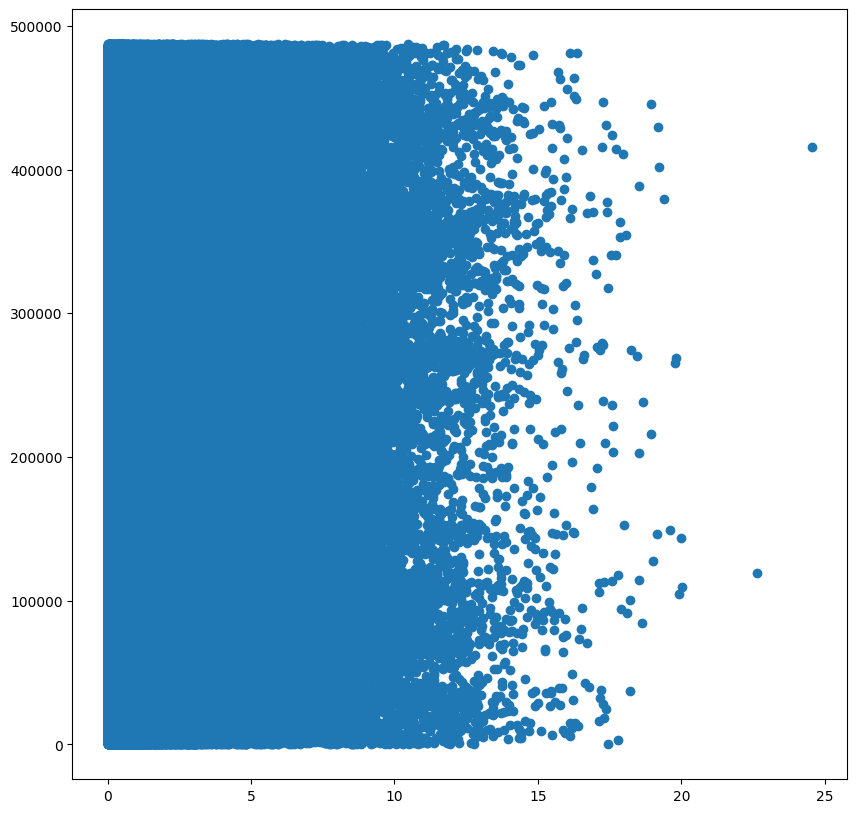

In [205]:
plt.figure(figsize=(10, 10))

plt.scatter(mini_data['rich_amine H2S mol frac'], mini_data["steps"]);

In [257]:
lean_amine_h2s_model.save('./models/amine_treatment/amine_treatment_lean_amine_h2s_model.h5')